# Базовая обработка текста

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.nltk.org/api/nltk.html
* https://pymorphy2.readthedocs.io/en/stable/
* https://docs.python.org/3/library/re.html
* https://regex101.com/

## Задачи для совместного разбора

1. Найдите все суммы (число плюс валюта), которые упоминаются в данном тексте. Выведите результат в виде списка кортежей из двух элементов (число, валюта)

In [ ]:
text = '''During my trip to Europe, I exchanged $10.50 for €20,00 at the currency exchange booth.
With ¥5000, I bought some souvenirs from a local market.
Later, I treated myself to a delicious meal at a restaurant, which cost me £15,99.
Finally, I converted 100₹ into the local currency to buy a traditional Indian artwork.'''

In [ ]:
import re

In [ ]:
patt = re.compile(r"([$€¥£₹]?)(\d+[.,]?\d*)([$€¥£₹]?)")
patt.findall(text)

[('$', '10.50', ''),
 ('€', '20,00', ''),
 ('¥', '5000,', ''),
 ('£', '15,99', ''),
 ('', '100', '₹')]

In [ ]:
[(x1 or x3, float(x2.replace(",",'.'))) for x1,x2,x3 in patt.findall(text)]

[('$', 10.5), ('€', 20.0), ('¥', 5000.0), ('£', 15.99), ('₹', 100.0)]

2\. Выясните, встречается ли в представленном фрагменте текста тавтология.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import  RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
sw = stopwords.words("english")

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
stemmer = SnowballStemmer("english")
words = [
    stemmer.stem(word)
    for word in tokenizer.tokenize(text)
    if word.lower() not in sw
]

In [ ]:
from collections import Counter
Counter(words).most_common()

[('exchang', 2),
 ('currenc', 2),
 ('local', 2),
 ('trip', 1),
 ('europ', 1),
 ('10', 1),
 ('50', 1),
 ('20', 1),
 ('00', 1),
 ('booth', 1),
 ('5000', 1),
 ('bought', 1),
 ('souvenir', 1),
 ('market', 1),
 ('later', 1),
 ('treat', 1),
 ('delici', 1),
 ('meal', 1),
 ('restaur', 1),
 ('cost', 1),
 ('15', 1),
 ('99', 1),
 ('final', 1),
 ('convert', 1),
 ('100', 1),
 ('buy', 1),
 ('tradit', 1),
 ('indian', 1),
 ('artwork', 1)]

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Исследуйте, какие формы слова "кот" или "кошка" встречаются в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Сгруппируйте найденные слова по начальной форме и представьте результата в виде словаря, где ключом является начальная форма слова, а значением - список форм этого слова, которые встретились в тексте. Примеры подходящих слов: "котейки", "кошечка", "котик" и т.д.

In [9]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import  RegexpTokenizer
from nltk.stem import SnowballStemmer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df1 = pd.read_csv('Лучше кошки зверя нет 2.csv', header=None)
df1.head()

,0,1,2
0,http://forum.moya-semya.ru/index.php?app=forum...,Завтра мои котейки идут к врачу. А 21-го жду и...,Unknown
1,http://forum.moya-semya.ru/index.php?app=forum...,Котя скучает по мужу. Со вторника спит на его ...,Unknown
2,http://forum.moya-semya.ru/index.php?app=forum...,"Получилось так, что мне пришлось ""отдать"" мою ...",Unknown
3,http://forum.moya-semya.ru/index.php?app=forum...,Лучше всего для начала спросить об этом у люде...,Unknown
4,http://forum.moya-semya.ru/index.php?app=forum...,"что волонтеры принесут, то и насыпалиЗначит, к...",Unknown


In [12]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=2c32570864de48b109659fdccd7d66383f8436c97591f2559859f42795bea28e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [13]:
from pymorphy2 import MorphAnalyzer

In [159]:
morph = MorphAnalyzer()
sw_r = stopwords.words("russian")
tokenizer = RegexpTokenizer(r"\w+")

lemmed_texts = df1[1].apply(
    lambda x: [(morph.normal_forms(word)[0],word) for word in tokenizer.tokenize(x) if word.lower() not in sw_r]
    )
lemmed_texts

0       [(завтра, Завтра), (мой, мои), (котейка, котей...
1       [(котить, Котя), (скучать, скучает), (муж, муж...
2       [(получиться, Получилось), (прийтись, пришлось...
3       [(начало, начала), (спросить, спросить), (чело...
4       [(волонтёр, волонтеры), (принести, принесут), ...
                              ...                        
1579    [(ночь, ночь), (сыпать, сыпать), (корм, корма)...
1580    [(реально, реально), (голодный, голодные), (ку...
1581    [(разница, разницы), (эмоция, эмоциях), (челов...
1582    [(который, Который), (деньтожий, деньТоже), (з...
1583    [(хотеть, Хочу), (сказать, сказать), (спасибо,...
Name: 1, Length: 1584, dtype: object

In [160]:
d = {"кот": [], "кошка": []}
for i in lemmed_texts:
  for f,s in i:
    if f.lower() in ("кот", "кошка"):
      d[f].append(s)

In [161]:
d['кошка'][:10]

['кошку',
 'кошка',
 'кошки',
 'кошка',
 'кошку',
 'кошка',
 'кошки',
 'кошка',
 'кошка',
 'кошка']

In [162]:
d['кот'][:10]

['Коты', 'коты', 'коты', 'Коты', 'кот', 'коту', 'коты', 'котов', 'кот', 'кот']

<p class="task" id="2"></p>

2\. Получите и выведите на экран набор имён питомцев, упомянутых в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Для простоты считайте, что имя питомца начинается с заглавной буквы и стоит не в начале предложения.

In [23]:
import re

In [18]:
!pip install rusenttokenize

In [19]:
from rusenttokenize import ru_sent_tokenize

In [20]:
tokenizer = RegexpTokenizer(r"\w+")

In [21]:
texts2 = df1[1].apply(
    lambda x: ' '.join([' '.join(tokenizer.tokenize(sent)[1:]) for sent in ru_sent_tokenize(x)])
    )
texts2

0       мои котейки идут к врачу 21 го жду их домой по...
1       скучает по мужу вторника спит на его тапках ст...
2       так что мне пришлось отдать мою кошку Зосю мам...
3       всего для начала спросить об этом у людей где ...
4       волонтеры принесут то и насыпалиЗначит котики ...
                              ...                        
1579    на ночь сыпать больше корма Я своим насыпаю по...
1580    вот когда реально голодные кусаются тяпнуть за...
1581    нет разницы в эмоциях человека и кота выглядит...
1582    деньТоже запал Если не пристроили напишите поф...
1583    сказать спасибо большое тем кто советовал оста...
Name: 1, Length: 1584, dtype: object

In [25]:
res2 = list(
    texts2.apply(
        lambda x: re.findall(r"[А-ЯЁ]+\w+", x)
        ).explode().dropna()
    )
res2[50:60]

['Котя',
 'Мурик',
 'Мусенька',
 'Радугу',
 'Отравили',
 'Инопланетный',
 'Василия',
 'Сколько',
 'Инопланетный',
 'Коти']

<p class="task" id="3"></p>

3\. Вычислите среднюю длину сообщения (в количестве предложений) в различных темах форума газеты "Моя Семья" (каждый файл из каталога `data/moya-semia` соответствует отдельной теме". Представьте результат в виде столбчатой диаграммы. Подпишите рисунок и дайте названия осям.  

In [58]:
import matplotlib.pyplot as plt
from rusenttokenize import ru_sent_tokenize

In [59]:
titles = ['Бенгалы', 'Лучше кошки зверя нет 2', 'Немецкая овчарка', 'Таксы']
avg_count = []

for title in titles:
  texts = pd.read_csv(title+'.csv', header=None).dropna(subset=[1])[1]
  cnt = texts.apply(lambda x: len(ru_sent_tokenize(x))).mean()
  avg_count.append(cnt)

avg_count

[11.958333333333334, 8.984848484848484, 8.265060240963855, 6.618421052631579]

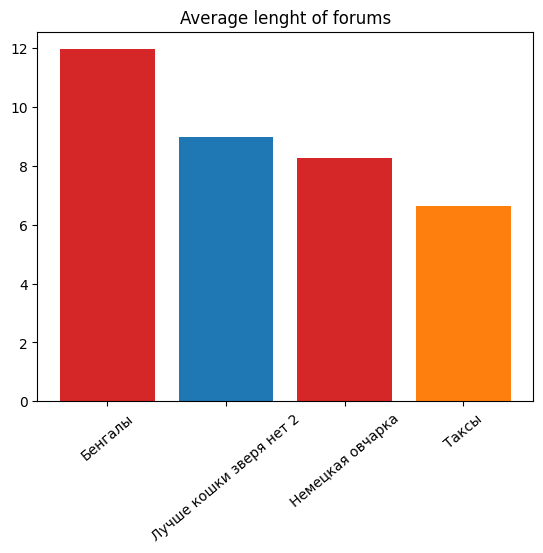

In [78]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.bar(titles,avg_count, color=bar_colors)
plt.xticks(rotation=40)
plt.title('Average lenght of forums')
plt.show()

<p class="task" id="4"></p>

4\. Замените все текстовые смайлики из файла `livejounal/психология.csv` на соответствующие символы юникода. Для поиска смайликов воспользуйтесь регулярными выражениями. Ниже представлен список (не исчерпывающий) примеров возможных смайликов и символ, на который их нужно заменить:

* :=), =-), =-))), ))) и т.д. -> \u263A
* ;), ;-), ;-)) и т.д. -> \U0001F609
* :D, :-D, =-D, =-DDD и т.д. -> \U0001F600
* :=(, :-(, =-(((, (((, ;-( и т.д. -> \U0001F641

In [115]:
def replace_emoji(text):
  text = re.sub(r'[;]+[-]*[)]+', '\U0001F609', text)
  text = re.sub(r'[:=]*[=-]*[)]+', '\u263A', text)
  text = re.sub(r'[:=]*[-=]*D+', '\U0001F600', text)
  text = re.sub(r'[:=;]*[-=]*[(]+', '\U0001F641', text)
  return text

test_string = ':=), :-), =-), =-))), ))), ;), ;-), ;-)), :D, :-D, =-D, =-DDD, :=(, :-(, =-(((, (((, ;-('
replace_emoji(test_string)

'☺, ☺, ☺, ☺, ☺, 😉, 😉, 😉, 😀, 😀, 😀, 😀, 🙁, 🙁, 🙁, 🙁, 🙁'

In [128]:
df4 = pd.read_csv('психология.csv')
df4.head()

,url,author,likes,text,comments
0,https://marikarai.livejournal.com/860.html?media,https://marikarai.livejournal.com/,23,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча..."
1,https://psychologies.livejournal.com/18496.htm...,https://psychologies.livejournal.com/,17,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр..."
2,https://kornilovasasha.livejournal.com/1458.ht...,https://kornilovasasha.livejournal.com/,67,"""Я чувствую, что не надо ехать"" - этого достат...",['Здравствуйте! Система категоризации Живого Ж...
3,https://rmnt-official.livejournal.com/118486.h...,https://rmnt-official.livejournal.com/,15,Пять причин беспорядка в доме и способы борьбы...,['Основных причин невозможности содержать в по...
4,https://kornilovasasha.livejournal.com/986.htm...,https://kornilovasasha.livejournal.com/,48,"Чувство Дома.\nКак эта шутка... ""Ты где?"" - ""Д...",['Ваша запись Чувство Дома в LiveJournal Media...


In [129]:
df4[df4['text'].apply(lambda x: ':-)' in x)]['text'].count()

11

In [130]:
df4[df4['text'].apply(lambda x: ':-)' in x)]['text'][67]

'Топ-5 эффективных и безрецептурных средств от тревожности.\nМногие из нас время от времени испытывают беспричинную тревожность [лично я не исключение]. Тем более, время сейчас такое… Думаю многим знакомы эти симптомы.Человек-дрожь-в-коленках, человек-потные-ладошки, начальник паники - это все про меня :-)Но, прочь отчаяние! С тревогой можно [и нужно] бороться.Сегодня попробую написать #полезныйпост , в котором поведаю о своём опыте и вариантах облегчения жизни супертревожного человека.Я не буду рассказывать о медикаментозных способах [ведь фармацевтические компании не платят мне за рекламу], все варианты проверены на себе, не слишком затратны и не требуют специальных знаний/умений. Итак поехали:\n\nКотики, собачки и другие эффективные антидепрессанты\n\nОбщение с питомцами не только действенный, но и максимально приятный способ успокоить расшатанные нервы. Это реально работает можно просто гладить котика или обнимать любимого песеля и уже через несколько минут вы почувствуете как трев

In [131]:
df4['text'] = df4['text'].map(replace_emoji)
df4['text'][67]

'Топ-5 эффективных и безрецептурных средств от тревожности.\nМногие из нас время от времени испытывают беспричинную тревожность [лично я не исключение]. Тем более, время сейчас такое… Думаю многим знакомы эти симптомы.Человек-дрожь-в-коленках, человек-потные-ладошки, начальник паники - это все про меня ☺Но, прочь отчаяние! С тревогой можно [и нужно] бороться.Сегодня попробую написать #полезныйпост , в котором поведаю о своём опыте и вариантах облегчения жизни супертревожного человека.Я не буду рассказывать о медикаментозных способах [ведь фармацевтические компании не платят мне за рекламу], все варианты проверены на себе, не слишком затратны и не требуют специальных знаний/умений. Итак поехали:\n\nКотики, собачки и другие эффективные антидепрессанты\n\nОбщение с питомцами не только действенный, но и максимально приятный способ успокоить расшатанные нервы. Это реально работает можно просто гладить котика или обнимать любимого песеля и уже через несколько минут вы почувствуете как тревог

In [132]:
df4[df4['text'].apply(lambda x: ':-)' in x)]['text'].count()

0

<p class="task" id="5"></p>

5\. Для каждого поста из файла `livejounal/психология.csv` создайте числовой вектор, в котором содержится следующая информация
    * количество абзацев
    * количество предложений
    * количество слов
    * количество смайликов \u263A
    * количество смайликов \U0001F609
    * количество смайликов \U0001F600
    * количество смайликов \U0001F641

Полученный результат представьте в виде тензора `torch.Tensor`.

In [157]:
df4['text'][51]

'С Форестом Гампом в башке.\n'

In [158]:
ru_sent_tokenize(df4['text'][51])

['С Форестом Гампом в башке.', '']

In [163]:
sw_r = stopwords.words("russian")
tokenizer = RegexpTokenizer(r"\w+")

In [170]:
df5 = pd.DataFrame()

df5['npars'] = df4['text'].apply(lambda x: x.count('\n'))
df5['nsents'] = df4['text'].apply(lambda x: len(ru_sent_tokenize(x)))
df5['nwords'] = df4['text'].apply(lambda x: len(tokenizer.tokenize(x)))
df5['nem1'] = df4['text'].apply(lambda x: x.count('\u263A'))
df5['nem2'] = df4['text'].apply(lambda x: x.count('\U0001F609'))
df5['nem3'] = df4['text'].apply(lambda x: x.count('\U0001F600'))
df5['nem4'] = df4['text'].apply(lambda x: x.count('\U0001F641'))

df5.head()

,npars,nsents,nwords,nem1,nem2,nem3,nem4
0,94,173,2292,7,0,0,5
1,191,322,4581,3,0,0,3
2,33,91,860,12,0,0,12
3,137,141,2024,0,0,0,0
4,29,73,610,0,0,0,0


In [171]:
import torch as th

In [174]:
t5 = th.tensor(df5.values)
t5[:5]

tensor([[  94,  173, 2292,    7,    0,    0,    5],
        [ 191,  322, 4581,    3,    0,    0,    3],
        [  33,   91,  860,   12,    0,    0,   12],
        [ 137,  141, 2024,    0,    0,    0,    0],
        [  29,   73,  610,    0,    0,    0,    0]])

<p class="task" id="6"></p>

6\. На основе файла `livejounal/психология.csv` выясните, кто из пользователей обладает наиболее широким словарным запасом (т.е. использовал максимальное количество различных слов в своих постах). При подсчете количества слов не учитывайте различные формы одного и того же слова, а также токены, не являющиеся словами (знаки препинания, цифры и т.д.). Выведите на экран имя пользователя и набор используемых им различных слов.

In [176]:
df6 = pd.read_csv('психология.csv')
df6.head()

,url,author,likes,text,comments
0,https://marikarai.livejournal.com/860.html?media,https://marikarai.livejournal.com/,23,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча..."
1,https://psychologies.livejournal.com/18496.htm...,https://psychologies.livejournal.com/,17,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр..."
2,https://kornilovasasha.livejournal.com/1458.ht...,https://kornilovasasha.livejournal.com/,67,"""Я чувствую, что не надо ехать"" - этого достат...",['Здравствуйте! Система категоризации Живого Ж...
3,https://rmnt-official.livejournal.com/118486.h...,https://rmnt-official.livejournal.com/,15,Пять причин беспорядка в доме и способы борьбы...,['Основных причин невозможности содержать в по...
4,https://kornilovasasha.livejournal.com/986.htm...,https://kornilovasasha.livejournal.com/,48,"Чувство Дома.\nКак эта шутка... ""Ты где?"" - ""Д...",['Ваша запись Чувство Дома в LiveJournal Media...


In [200]:
sw_r = stopwords.words("russian")
tokenizer = RegexpTokenizer(r"[а-яёА-ЯЁ]+")
morph = MorphAnalyzer()

df6['unique_words'] = df6['text'].apply(
    lambda x: set([morph.normal_forms(word)[0] for word in tokenizer.tokenize(x) if word.lower() not in sw_r])
    )
df6['num_unique_words'] = df6['unique_words'].apply(lambda x: len(x))
df6.head()

,url,author,likes,text,comments,unique_words,num_unique_words
0,https://marikarai.livejournal.com/860.html?media,https://marikarai.livejournal.com/,23,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча...","{узнавать, смерть, меняться, психолог, остават...",354
1,https://psychologies.livejournal.com/18496.htm...,https://psychologies.livejournal.com/,17,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр...","{отвлекать, очевидный, сладкое, бороться, снов...",685
2,https://kornilovasasha.livejournal.com/1458.ht...,https://kornilovasasha.livejournal.com/,67,"""Я чувствую, что не надо ехать"" - этого достат...",['Здравствуйте! Система категоризации Живого Ж...,"{табак, распечатка, работать, документ, немоло...",134
3,https://rmnt-official.livejournal.com/118486.h...,https://rmnt-official.livejournal.com/,15,Пять причин беспорядка в доме и способы борьбы...,['Основных причин невозможности содержать в по...,"{лишний, переделать, традиция, куча, явно, пси...",310
4,https://kornilovasasha.livejournal.com/986.htm...,https://kornilovasasha.livejournal.com/,48,"Чувство Дома.\nКак эта шутка... ""Ты где?"" - ""Д...",['Ваша запись Чувство Дома в LiveJournal Media...,"{печь, просушить, взять, оставаться, хрустальн...",131


In [201]:
smartest_user = df6.sort_values('num_unique_words', ascending=False).iloc[0]
smartest_user

url                 https://evo-lutio.livejournal.com/1284854.html...
author                             https://evo-lutio.livejournal.com/
likes                                                              15
text                Письмо: "С одного стакана пить противно".\nЭто...
comments            ['\\"А перед этим был инцидент – приревновал к...
unique_words        {лишний, оставаться, ночью, долечиваться, быст...
num_unique_words                                                 1407
Name: 484, dtype: object

In [202]:
username = re.findall(r'https://([\S]+).livejournal.com/', smartest_user['author'])[0]
username

'evo-lutio'

In [203]:
set_unique_words = smartest_user['unique_words']
set_unique_words

{'лишний',
 'оставаться',
 'ночью',
 'долечиваться',
 'быстро',
 'эмоция',
 'банк',
 'свой',
 'вернуться',
 'рядом',
 'молча',
 'пыль',
 'ездить',
 'сам',
 'проект',
 'спортивный',
 'добровольный',
 'защищаться',
 'мужик',
 'няня',
 'постинора',
 'оз',
 'сосед',
 'подышать',
 'оттереть',
 'запомнить',
 'соглашаться',
 'отозвать',
 'попросить',
 'задерживать',
 'добавить',
 'бойфренд',
 'либо',
 'профессия',
 'справка',
 'истерил',
 'думать',
 'который',
 'побежать',
 'удивлённый',
 'ляжка',
 'удаться',
 'просто',
 'эволюция',
 'экономический',
 'усилие',
 'бред',
 'договорённость',
 'пугать',
 'факт',
 'долг',
 'отпасть',
 'вынудить',
 'расчёт',
 'колено',
 'самый',
 'резко',
 'часть',
 'выход',
 'точка',
 'конкретно',
 'выполнить',
 'закрутить',
 'назад',
 'подремонтировать',
 'отвечать',
 'видеть',
 'видимо',
 'открыто',
 'комната',
 'ужас',
 'взломать',
 'чудесный',
 'правда',
 'внешность',
 'квартира',
 'покупать',
 'угрожать',
 'хобби',
 'лично',
 'приложение',
 'смска',
 'аж',
 '

## Обратная связь
- [ ] Хочу получить обратную связь по решению